# Computer Vision Libraries in PyTorch

* **torchvision** - Base domain library for PyTorch Computer Vision.
* **torchvision.datasets** - Get datasets & data loading functions(Many datasets are available here, ex: ImageNet,...).
* **torchvision.models** - Pre-trained Computer Vision models (Transfer Learning).
* **torchvision.transforms** - Manipulating vision data(images) to be suitable for use with ML models.
* **torch.utils.data.Dataset** - Base dataset class for PyTorch.
* **torch.utils.data.DataLoader** - Creates a Python iterable over a dataset.



In [2]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import torchmetrics
import torchmetrics

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/gd/anaconda3/envs/envResearch/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/gd/anaconda3/envs/envResearch/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## 1. Getting a dataset

**The dataset we'll be using is FashionMNIST from torchvision.datasets**

In [3]:
# Setup training data

train_data = datasets.FashionMNIST( 
    root="data",           # where to download data?
    train=True,            # do we want the training dataset? False -> give test data sample
    download=True,         # do we want to download yes/no?
    transform=ToTensor(),  # how do we want to transform the data?
    target_transform=None  # how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
# See the first training example
image, label = train_data[0]
print(f"Image tensor: \n{image}")
print(f"Label: {label}")

Image tensor: 
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# Class names of dataset

class_names = train_data.classes

NUM_CLASSES = len(class_names)

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# Class names with index 

class_names_idx = train_data.class_to_idx
class_names_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# Check the shape of image first first training example(image)

print(f"Image shape: {image.shape} -> [color_channel, height, width]")
print(f"Image label: {class_names[label]}")


Image shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Image label: Ankle boot


### Visualize our data

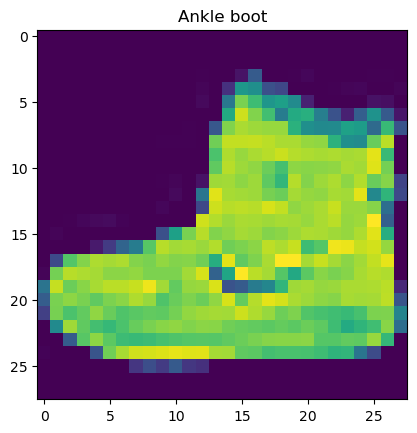

In [8]:
plt.title(class_names[label]) # Class name as image title
plt.imshow(image.squeeze())   # Remove color channel (gray scale [color_channel = 1])

Text(0.5, 1.0, 'Ankle boot')

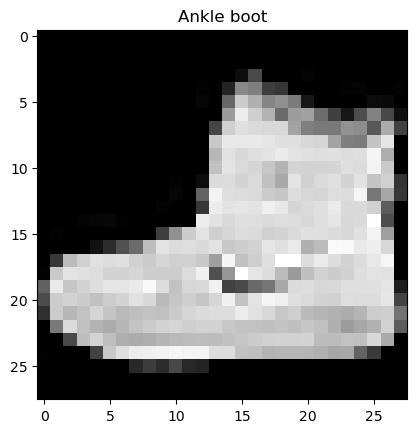

In [9]:
plt.imshow(image.squeeze(), cmap="gray")  # Image in black and white
plt.title(class_names[label])

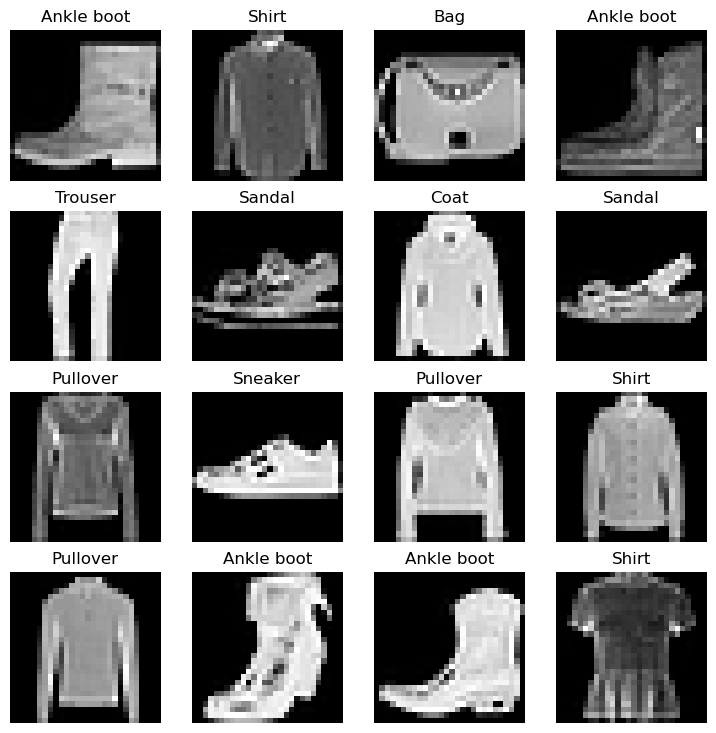

In [10]:
# Plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.axis(False)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])

## 2. Prepare DataLoader

Right now, data is in the form of PyTorch Datasets.

DataLoader turns dataset into a Python iterable.

More specifically, want to turn data into batches (or mini-batches).

***Why batches (or mini batches) ?***
1. It is more computationlly efficient.
2. It gives neural network more chances to update its gradients per epoch.

More on mini-batches, see here: https://youtu.be/-_4Zi8fCZO4?si=A1GDgnRJkZ_2fqSN, https://youtu.be/4qJaSmvhxi8?si=Mow34IblP_aFTVww

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Check train_dataloader and test_dataloader size
print(f"Length of train_dataloader: {len(train_dataloader)}")
print(f"Length of test_dataloader: {len(test_dataloader)}")

# Check original train_data and test_data size
print(f"Length of train_data: {len(train_data)}")
print(f"Length of test_data: {len(test_data)}")

Length of train_dataloader: 1875
Length of test_dataloader: 313
Length of train_data: 60000
Length of test_data: 10000


In [12]:
# Checks what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"train_features_batch shape: {train_features_batch.shape}")
print(f"train_labels_batch shape: {train_labels_batch.shape}")

# Checks what's inside the testing dataloader
test_features_batch, test_labels_batch = next(iter(train_dataloader))
print(f"test_features_batch shape: {test_features_batch.shape}")
print(f"test_labels_batch shape: {test_labels_batch.shape}")

train_features_batch shape: torch.Size([32, 1, 28, 28])
train_labels_batch shape: torch.Size([32])
test_features_batch shape: torch.Size([32, 1, 28, 28])
test_labels_batch shape: torch.Size([32])


image size: torch.Size([1, 28, 28])


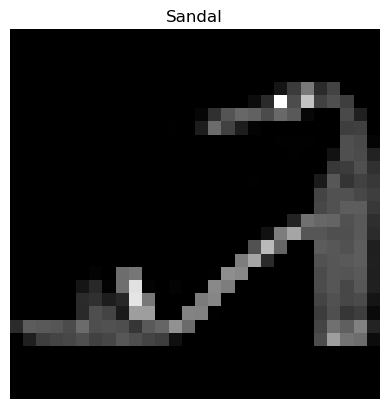

In [13]:
# Show a sample of batch

#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")

## 3. Model 0: Build a baseline model

When starting to build s series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: starts simply and add complexity when necessary.

#### Every layer in nn module is a model in it's own 
#### ***--> Have own forward propagation***

In [14]:
# Create a flatten layer
flatten_layer = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample x
output_x = flatten_layer(x)

# Print flatten x
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flatttening: {output_x.shape}")



Shape before flattening: torch.Size([1, 28, 28])
Shape after flatttening: torch.Size([1, 784])


In [15]:
# Build Model_0

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [16]:
# Create a instance of FashionMNISTModelV0

model_0 = FashionMNISTModelV0(
    input_shape=784,  # 28*28 -> Size(Resolution) of an image
    hidden_units=10, # no.of hidden units in a hidden layer
    output_shape=len(class_names) # One for every class
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
# Defint loss function
loss_function = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# Define evaluation metric
torchmetric_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=NUM_CLASSES)

In [18]:
# Time evaluation

from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device=torch.device):
    total_time = end - start
    print(f"Train time on {device}: {total_time: .3f} seconds")
    return total_time
    

#### Creating a training loop and training a model on batches of data...
#### Optimizer will update a model's parameters once per batch rather than once per epoch...

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss ***per batch***.
3. Loop through testing batches, perform testing steps,calculate the test loss ***per batch***.

#### **tqdm progress bar** for visualize the progress

In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keep this small for faster training time)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    
    ### Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (images, labels) in enumerate(train_dataloader):
        # Model train mode
        model_0.train()

        # Forward pass
        y_train_pred_logits = model_0(images)


        # Calculate loss & accuracy (per batch)
        loss = loss_function(y_train_pred_logits, labels)
        # train_accuracy = torchmetric_accuracy(y_train_pred_logits.argmax(dim=1), labels)
        train_loss += loss  # accumulate train loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

        # Print results for batch iteration
        if batch % 400 == 0:
            print(f"Looked at {batch*len(images)}/{len(train_dataloader.dataset)} samples.")
        
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_accuracy = 0, 0
    
    # Model test mode
    model_0.eval()

    with torch.inference_mode():
        for test_images, target in test_dataloader:
            # Forward propagation
            y_test_pred_logits = model_0(test_images) 

            # Calculate the loss (accumulatively)
            test_loss += loss_function(y_test_pred_logits, target)

            # Calculate accuracy
            test_accuracy += torchmetric_accuracy(y_test_pred_logits.argmax(dim=1), target)

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test accuracy per batch
        test_accuracy /= len(test_dataloader)

    # Print loss and accuracy results
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}")
    print(f"\nTest accuracy: {test_accuracy*100:.4f}%")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.6003 | Test loss: 0.5149

Test accuracy: 81.7592%
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4798 | Test loss: 0.4877

Test accuracy: 82.6178%
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4570 | Test loss: 0.4800

Test accuracy: 83.4065%
Train time on cpu:  16.882 seconds


#### Evaluation function

In [20]:
# Defining evaluation function

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_function: torch.nn.Module,
               accuracy_function):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for images, target in tqdm(data_loader):
            # Make predictions
            pred_logits = model(images)

            # Accumulate the loss and accuracy values per batch
            loss += loss_function(pred_logits, target)
            acc += accuracy_function(pred_logits.argmax(dim=1), target)
        
        # Scale loss and accuracy to find the average loss/accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"Model Name": model.__class__.__name__,  # Only works when model was created with a class
            "Model Loss": loss.item(),
            "Model Accuracy": acc.item()*100}

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_function=loss_function,
                             accuracy_function=torchmetric_accuracy)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.4800224006175995,
 'Model Accuracy': 83.40654969215393}

## 4. Model_1: Building a better model with non-linearity

In [21]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [22]:
# Create an instance of model_1

torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [23]:
# Defining loss function, optimizer and accuracy function

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
torchmetric_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=NUM_CLASSES)

##### Functionizing trainig and evaluation/testing loops

Functions for:

* ***training loop - train_step()***
* ***testing loop - test_step()***

In [24]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_function: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_function,
               device):
    """Performs a training with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (data, label) in tqdm(enumerate(data_loader)):
        # Put data on target device
        data, label = data.to(device), label.to(device)
        
        # Forward propagation
        y_pred_logits = model(data)
        
        # Calculate loss and accuracy (per batch)
        loss = loss_function(y_pred_logits, label)
        train_loss += loss   # Accumulate train loss
        train_acc += accuracy_function(y_pred_logits.argmax(dim=1), label)

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()
        
    # Take the average of the training loss and accuracy for a batch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss: .5f} | Train Accuracy: {train_acc*100: .2f}%")




In [25]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_function: torch.nn.Module,
              accuracy_function,
              device):
    """Performs a testing loop step on model going over data_loader"""
    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model.eval()

    with torch.inference_mode():
        for batch, (data, target) in enumerate(data_loader):
            data, target = data.to(device), target.to(device)

            # Forward propagation
            y_pred_logits = model(data)

            # Calculate loss and accuracy
            test_loss += loss_function(y_pred_logits, target)
            test_acc += accuracy_function(y_pred_logits.argmax(dim=1), target)

        # Adjust metrics and print
        test_loss = test_loss/len(data_loader)
        test_acc = test_acc/len(data_loader)
        print(f"Test Loss: {test_loss: .5f} | Test Accuracy: {test_acc*100: .2f}%\n")

In [26]:
torch.manual_seed(42)

# Start timer 
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create training and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_function=loss_function,
               optimizer=optimizer,
               accuracy_function=torchmetric_accuracy.to(device),
               device=device)
               
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_function=loss_function,
              accuracy_function=torchmetric_accuracy.to(device),
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


0it [00:00, ?it/s]

Train Loss:  1.09199 | Train Accuracy:  61.34%
Test Loss:  0.95636 | Test Accuracy:  65.00%

Epoch: 1
---------


0it [00:00, ?it/s]

Train Loss:  0.78101 | Train Accuracy:  71.93%
Test Loss:  0.72227 | Test Accuracy:  73.91%

Epoch: 2
---------


0it [00:00, ?it/s]

Train Loss:  0.67027 | Train Accuracy:  75.94%
Test Loss:  0.68500 | Test Accuracy:  75.02%

Train time on cuda:  32.790 seconds


In [27]:
# Defining evaluation function with device agnostic

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_function: torch.nn.Module,
               accuracy_function):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (data, target) in tqdm(enumerate(data_loader)):
            # Put data into device
            data, target = data.to(device), target.to(device)

            # Make predictions
            pred_logits = model(data)

            # Accumulate the loss and accuracy values per batch
            loss += loss_function(pred_logits, target)
            acc += accuracy_function(pred_logits.argmax(dim=1), target)
        
        # Scale loss and accuracy to find the average loss/accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"Model Name": model.__class__.__name__,  # Only works when model was created with a class
            "Model Loss": loss.item(),
            "Model Accuracy": acc.item()*100}

# Calculate model_0 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_function=loss_function,
                             accuracy_function=torchmetric_accuracy)

model_1_results

0it [00:00, ?it/s]

{'Model Name': 'FashionMNISTModelV1',
 'Model Loss': 0.6850008368492126,
 'Model Accuracy': 75.01996755599976}

## Model 2: Building Convolutional Neural Network (CNN)

In [28]:
# Create a Convolutional Neural Network (CNN)

class FashionMNISTCNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*0,  # There's trick to calculating this...
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier_layer(x)
        return x


In [29]:
# Create an instance of CNN model

torch.manual_seed(42)
model_cnn = FashionMNISTCNN(input_shape=1,
                            hidden_units=10,
                            output_shape=NUM_CLASSES).to(device)

/home/gd/anaconda3/envs/envResearch/lib/python3.9/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
